# What is Demension Reduction?
***

이번 챕터에서는 **차원축소(Demension Reduction)**에 대해서 알아보도록 하겠습니다. 일반적으로 차원축소는 매우 많은 변수들을 가진 데이터의 차원(변수)을 축소하는 것입니다. 일반적으로 데이터의 차원이 증가하면 데이터는 **희소(sparse)**한 형태를 띄게 됩니다. 수백 수천개의 변수로 이루어진 데이터 보다 보다 적은 개수의 변수를 가진 데이터가 모델링에서 성능이 더 좋을 것입니다. 또한 차원이 증가하면 변수들간의 상관관계가 높아져 결과적으로 **다중공선성** 문제가 발생해 모델의 성능이 저하될 수 있습니다.

차원축소를 하게 되면 모델의 성능을 올릴 수도 있고 좀 더 직관적으로 데이터를 표현할 수 있습니다. 데이터의 차원이 줄어 결과적으로 데이터의 크기(용량)가 줄어들기 때문에 학습 수행 속도에서도 차이를 보일 수 있습니다. 하지만 차원축소의 경우 축소된 데이터를 설명하거나 해석하는데 어려움이 있습니다. 예를 들어 각종 고객 정보가 있는 다차원의 데이터를 7차원으로 줄였을 때 이 7개의 변수에 대한 설명을 어떻게 해야할지도 중요한 문제가 됩니다. 

차원축소는 **특성 선택(feature selection)**과 **특성 추출(feature extraction)**로 나뉘게 됩니다. **특성 선택**은 어휘 그대로 필요한 특성만 사용하고 불필요한 특성은 제거하는 방식입니다. 데이터를 설명하는데 주요한 특성만 선택하는 것으로 이와 달리 **특성 추출**은 기존 변수를 저차원으로 압축하여 추출하는 것입니다. 다차원의 특성들을 함축적으로 표현할 수 있는 새로운 특성으로 압축시키는 것이라고 할 수 있겠습니다. 

차원축소의 궁극적인 목표는 특성의 수를 줄이는 것이 아니라 차원을 줄임으로써 특성들에 숨어 있는 **잠재적인(latent) 요소**를 찾아내는 것입니다. 잠재적인 요소는 최근 **추천 시스템**에서 가장 활발할게 사용되고 있는데 추천시스템에서는 고객들의 구매 이력 등 다양한 특성에서 숨어있는 요소를 추출하는데 주안점을 두고 있습니다.

***

## PCA(Principal Component Analysis)

**PCA(Principal Component Analysis)**는 대표적인 차원 축소 알고리즘으로 변수들 간의 **상관관계**를 기준으로 **주성분**을 찾아내 차원을 축소하는 방법입니다. 차원 축소 과정은 데이터 값들을 가장 잘 설명할 수 있는(분산이 가장 큰) 축을 찾아내고 이 축과 직각이 되는 축 중에서 또 분산이 가장 큰 축을 찾아내는 과정을 반복합니다. PCA는 결국 소수의 축(변수)으로 데이터를 잘 설명할 수 있도록 하는 방법이라고 할 수 있습니다.

In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df.shape[1]

5

데이터의 차원은 타겟 값을 제외하고 4차원입니다. 

In [57]:
marker = ['x', 'o', '*']

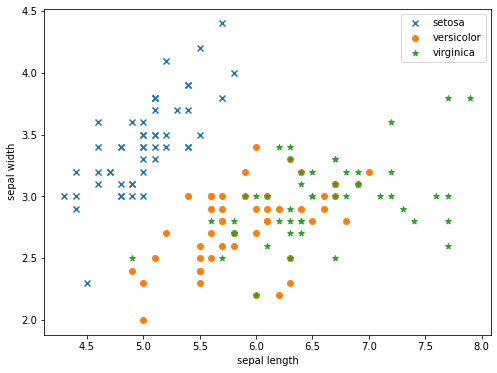

In [58]:
plt.figure(figsize = (8, 6))
for i, m in enumerate(marker) :
    
    x = df[df.target == i][df.columns[0]]
    y = df[df.target == i][df.columns[1]]
    
    plt.scatter(x, y, marker = m, label = iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

색깔과 마커 모양으로는 데이터를 구별하기에는 쉽지만 뚜렷하게 나뉘진 않은 것을 알 수 있습니다.

이제 4차원의 데이터를 2차원으로 축소시켜보도록 하겠습니다.

PCA는 속성의 **스케일링**에 영향을 받으므로 수행 전에 스케일링을 해주는 작업이 필요합니다. 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
scaled_df = StandardScaler().fit_transform(df.iloc[:, :-1])

In [52]:
pca = PCA(n_components = 2, random_state = 125)

In [53]:
pca_value = pca.fit_transform(scaled_df)

In [54]:
pca_df = pd.DataFrame(pca_value, columns = ['component_1', 'component_2'])

In [55]:
pca_df['target'] = iris.target

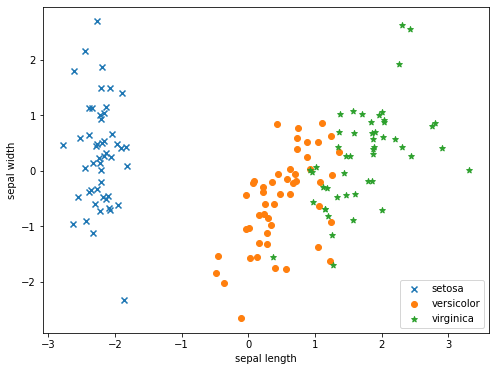

In [59]:
plt.figure(figsize = (8, 6))
for i, m in enumerate(marker) :
    
    x = pca_df[pca_df.target == i][pca_df.columns[0]]
    y = pca_df[pca_df.target == i][pca_df.columns[1]]
    
    plt.scatter(x, y, marker = m, label = iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

기존의 결과보다 훨씬 더 명확하게 데이터가 나누어진 것을 알 수 있습니다.

실제로 각 주성분이 설명하고 있는 데이터의 변동량을 확인할 수 있습니다. 우리는 2차원으로 데이터를 압축했기 때문에 결과는 2개의 값을 반환합니다.

In [61]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


첫번째 주성분의 값은 전체 변동의 약 73%를 설명하고 두번째 주성분의 값은 전체 변동의 약 23%를 설명하는 것을 알 수 있습니다.

즉 두개의 변수만으로 전체 데이터의 약 95%를 설명할 수 있다고 볼 수 있습니다.

이제 실제로 PCA 적용 전 후의 데이터로 모델링을 해보도록 하겠습니다.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [76]:
rf = RandomForestClassifier(random_state = 125)

In [77]:
score = cross_val_score(rf, df.iloc[:, :-1], df.target, scoring = 'accuracy', cv = 3)

In [78]:
score.mean()

0.9666666666666667

PCA 적용 전에는 정확도가 97%에 달하는 것을 알 수 있습니다.

In [82]:
pca_score = cross_val_score(rf, pca_df.iloc[:, :-1], pca_df.target, scoring = 'accuracy', cv = 3)

In [83]:
pca_score.mean()

0.88

하지만 적용 후에는 정확도가 88%에 그친 것을 알 수 있는데요. 일반적으로 PCA를 적용하면 예측 성능이 저하됩니다. 모든 알고리즘이 일장일단이 있기 때문에 역시 여러 방면으로 시도해보는것이 중요하겠습니다.

다음 챕터에서는 **LDA(Linear Discriminant Analysis)**에 대해서 알아보도록 하겠습니다. 감사합니다.